In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [82]:
file_path = "C:/Users/siddh/Desktop/Study/Quarter 4/ALY6150 HealthcarePharmaceutical Data and Applications/Major Project/"
data = pd.read_csv(file_path + "diabetic_data.csv")

In [83]:
data = data.drop(['encounter_id', 'patient_nbr', 'payer_code', 'diag_1','diag_2','diag_3'], axis=1)

In [84]:
data = data.replace('?', np.nan)

In [85]:
data_na = {}

for i in range(0,44):
    data_na[data.columns.values[i]] = data.iloc[:,i].isna().sum()

In [86]:
data = data.drop(['weight', 'medical_specialty'], axis=1)

In [87]:
data = data.dropna()

In [88]:
data_na = {}
# veriying the number of NAs
for i in range(0,42):
        data_na[data.columns.values[i]] = data.iloc[:,i].isna().sum()

In [89]:
#EDA 

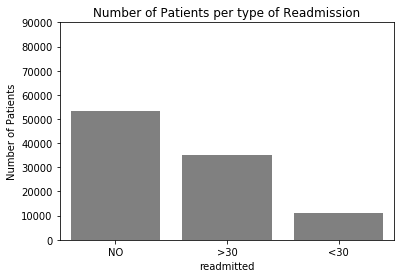

<Figure size 432x288 with 0 Axes>

In [90]:
plt.figure()
sns.countplot(data['readmitted'], color= 'gray')
plt.yticks(np.arange(0,100000,10000))
plt.ylabel('Number of Patients')
plt.title('Number of Patients per type of Readmission')
plt.show()
plt.clf()

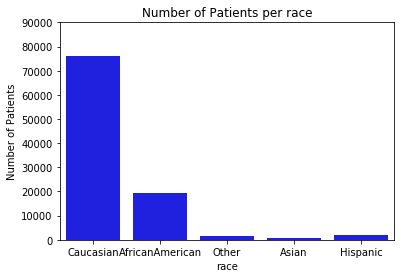

<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure()
sns.countplot(data['race'], color = 'blue')   
plt.yticks(np.arange(0,100000,10000))
plt.ylabel('Number of Patients')
plt.title('Number of Patients per race')
plt.show()
plt.clf()

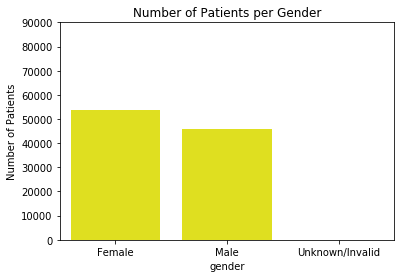

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure()
sns.countplot(data['gender'], color = 'yellow')   
plt.yticks(np.arange(0,100000,10000))
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Gender')
plt.show()
plt.clf()

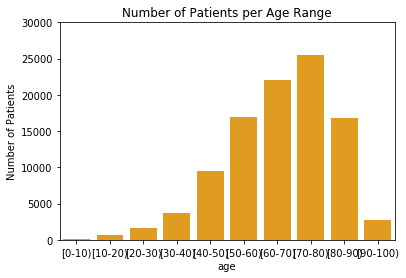

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure()
sns.countplot(data['age'], color = 'orange')   
plt.yticks(np.arange(0,35000,5000))
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Age Range')
plt.show()
plt.clf()

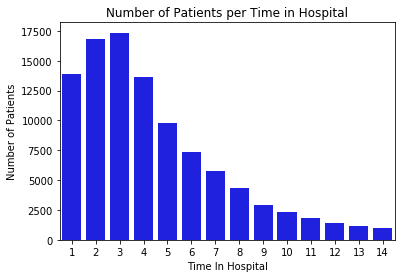

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure()
sns.countplot(data['time_in_hospital'], color = 'blue')   
plt.xlabel('Time In Hospital')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Time in Hospital')
plt.show()
plt.clf()

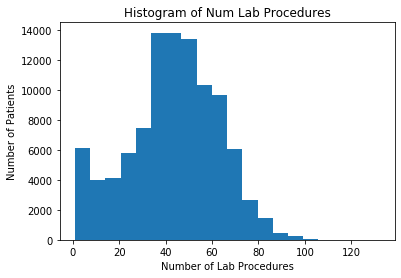

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure()
plt.hist(data['num_lab_procedures'], bins =20) 
plt.yticks(np.arange(0,16000,2000))
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Patients')
plt.title('Histogram of Num Lab Procedures')
plt.show()
plt.clf()

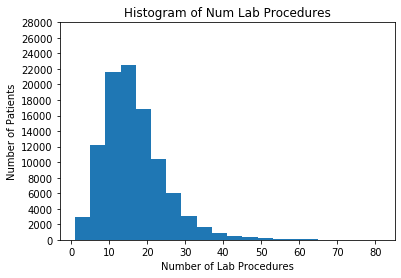

<Figure size 432x288 with 0 Axes>

In [96]:
plt.figure()
plt.hist(data['num_medications'], bins =20) 
plt.yticks(np.arange(0,30000,2000))
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Patients')
plt.title('Histogram of Num Lab Procedures')
plt.show()
plt.clf()

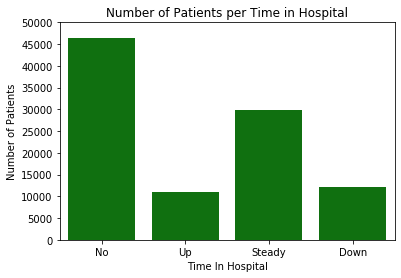

<Figure size 432x288 with 0 Axes>

In [97]:
plt.figure()
sns.countplot(data['insulin'], color = 'green')   
plt.yticks(np.arange(0,50001,5000))
plt.xlabel('Time In Hospital')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Time in Hospital')
plt.show()
plt.clf()

In [98]:
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count()) 

gender 1


Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64


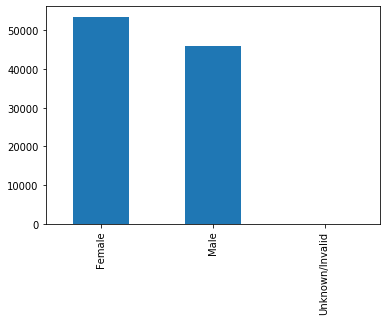

In [99]:
print(data.gender.value_counts())
data.gender.value_counts().plot(kind='bar')

In [100]:
data.drop(data.index[data['gender'] == 'Unknown/Invalid'], inplace = True)

In [101]:
# changing outcome variable

data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [102]:
# changing other vairbales

data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

In [103]:
#creating a list of categorical and numeric columns names
category_data = data.select_dtypes(include=['object'])
numeric_data =data.select_dtypes(exclude=['object'])
print(category_data.columns.values, '\n','--------------------------------------------------------------------------------','\n', numeric_data.columns.values )

['race' 'age' 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide'
 'nateglinide' 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide'
 'glyburide' 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose'
 'miglitol' 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone'] 
 -------------------------------------------------------------------------------- 
 ['gender' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'time_in_hospital' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'number_diagnoses' 'change' 'diabetesMed' 'readmitted']


In [104]:
#printing the frequency count of all the categorical features
for col in category_data:
    print(category_data[col].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64
[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64
None    94202
Norm     2571
>200     1466
>300     1253
Name: max_glu_serum, dtype: int64
None    82896
>8       7961
Norm     4905
>7       3730
Name: A1Cresult, dtype: int64
No        79971
Steady    17920
Up         1039
Down        562
Name: metformin, dtype: int64
No        97963
Steady     1375
Up          109
Down         45
Name: repaglinide, dtype: int64
No        98796
Steady      662
Up           23
Down         11
Name: nateglinide, dtype: int64
No        99407
Steady       78
Up            6
Down          1
Name: chlorpropamide, dtype: int64
No        94458
Steady     4527
Up          321
Down        186
Name: glimepiride, dt

In [105]:
treatments = ['metformin' ,'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide' ,'glipizide',\
              'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose' ,'miglitol' ,'troglitazone', \
              'tolazamide', 'insulin' ,'glyburide-metformin','glipizide-metformin', \
              'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [106]:
#assigning a value of 0 if there are not undergoing treatment and assigning 1 even if they are taking \
#increasing/decreasing/steady dosage
for i in treatments:
    data[i] = data[i].apply(lambda x: 0 if x == "No" else 1)

In [107]:
# AIC > 6.4 implies that the patient has diabetes. Therefore, considered values greater than 7 and 8 together.
# other 2 categories : Norm and None ; Norm implies the values in the normal range ; None implies no test conducted;
data['A1Cresult'] = data['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

In [108]:
data = pd.get_dummies(data, columns=['age', 'race'], drop_first = True)

In [109]:
data.corr()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_Asian,race_Caucasian,race_Hispanic,race_Other
gender,1.000000,0.015082,-0.020905,-0.003217,-0.029429,-0.002921,0.060775,-0.022710,-0.011945,-0.021065,...,0.026028,0.036875,0.048457,0.001624,-0.066598,-0.061302,0.006847,0.061293,0.000697,0.010311
admission_type_id,0.015082,1.000000,0.081921,0.108711,-0.012403,-0.142429,0.128789,0.079812,0.026707,-0.019491,...,-0.006135,0.008465,0.016564,0.021546,-0.029155,-0.022211,0.007926,0.082957,0.029523,0.009933
discharge_disposition_id,-0.020905,0.081921,1.000000,0.016723,0.162856,0.022999,0.015106,0.107662,-0.009848,-0.025491,...,-0.047595,-0.040861,-0.013923,0.043483,0.065986,0.037782,-0.014502,0.003346,-0.011164,-0.007833
admission_source_id,-0.003217,0.108711,0.016723,1.000000,-0.007365,0.048743,-0.134201,-0.054900,0.025959,0.059503,...,0.004496,-0.024825,-0.046033,0.005537,0.052371,0.037864,-0.004386,0.016788,0.013270,-0.000856
time_in_hospital,-0.029429,-0.012403,0.162856,-0.007365,1.000000,0.317656,0.193264,0.466394,-0.009546,-0.009801,...,-0.038253,-0.040803,-0.002013,0.038716,0.061250,0.019458,-0.010868,-0.007689,-0.016387,-0.005091
num_lab_procedures,-0.002921,-0.142429,0.022999,0.048743,0.317656,1.000000,0.058451,0.267013,-0.008562,-0.002231,...,-0.004160,-0.010510,-0.013745,0.001499,0.021913,0.012844,-0.007608,-0.021981,-0.002053,0.002451
num_procedures,0.060775,0.128789,0.015106,-0.134201,0.193264,0.058451,1.000000,0.385532,-0.024932,-0.038365,...,-0.000527,0.056088,0.072617,0.013777,-0.082631,-0.065423,0.000200,0.030623,-0.018983,0.013799
num_medications,-0.022710,0.079812,0.107662,-0.054900,0.466394,0.267013,0.385532,1.000000,0.044530,0.012965,...,-0.024400,0.031704,0.074128,0.027113,-0.038871,-0.046616,-0.027122,0.057573,-0.035541,-0.012900
number_outpatient,-0.011945,0.026707,-0.009848,0.025959,-0.009546,-0.008562,-0.024932,0.044530,1.000000,0.090941,...,-0.009842,-0.014401,0.008208,0.010072,0.017096,-0.012978,-0.013118,0.055168,-0.005533,-0.011345
number_emergency,-0.021065,-0.019491,-0.025491,0.059503,-0.009801,-0.002231,-0.038365,0.012965,0.090941,1.000000,...,0.055662,0.012141,-0.020543,-0.042726,-0.025990,-0.011956,-0.009230,-0.030055,0.004143,0.005254


In [110]:
corr = ~(data.corr().mask(np.eye(len(data.corr()), dtype=bool)).abs() > 0.75).any()
corr

gender                      True
admission_type_id           True
discharge_disposition_id    True
admission_source_id         True
time_in_hospital            True
num_lab_procedures          True
num_procedures              True
num_medications             True
number_outpatient           True
number_emergency            True
number_inpatient            True
number_diagnoses            True
max_glu_serum               True
A1Cresult                   True
metformin                   True
repaglinide                 True
nateglinide                 True
chlorpropamide              True
glimepiride                 True
acetohexamide               True
glipizide                   True
glyburide                   True
tolbutamide                 True
pioglitazone                True
rosiglitazone               True
acarbose                    True
miglitol                    True
troglitazone                True
tolazamide                  True
insulin                     True
glyburide-

In [111]:
nos = []
for i in range(13,38):
    col = data.columns[i]
    numNotNo = len(data[data[col] != 0])
    if (numNotNo < 1000):
        nos.append(col)

nos

['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [112]:
data.drop(['examide','citoglipton'], axis = True, inplace = True)

In [113]:
data.dtypes

gender                      int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol                    int64
troglitazone                int64
tolazamide                  int64
insulin       

In [114]:
y = data['readmitted']
X = data.drop(['readmitted'], axis=1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

In [116]:
sel_chi2 = SelectKBest(chi2)    
X_train_chi2 = pd.DataFrame(sel_chi2.fit_transform(X_train, y_train))
X_train_chi2.columns = X_train.columns[sel_chi2.get_support()]

In [117]:
scores = pd.DataFrame(sel_chi2.scores_)
columns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']

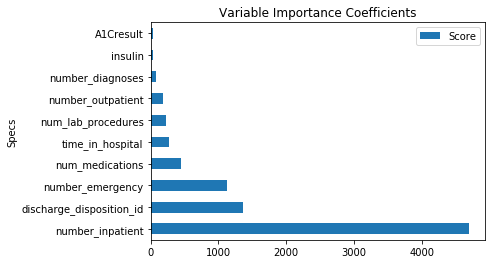

<Figure size 432x288 with 0 Axes>

In [118]:
ax = featureScores.nlargest(10,'Score').plot(x = 'Specs', kind='barh', zorder = 1)
ax.set_title('Variable Importance Coefficients')
plt.show()
plt.clf()

In [80]:
X_train_fs = X_train[X_train_chi2.columns]
X_test_fs = X_test[X_train_chi2.columns]

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_fs)
X_test_scaled = sc.fit_transform(X_test_fs)

In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#specificity
def calc_specificity(y_act, y_pred, threshold):
    return sum((y_pred < threshold) & (y_act == 0)) /sum(y_act ==0)

def print_report(y_act, y_pred, threshold):
    
    accuracy = accuracy_score(y_act, (y_pred > threshold))
    specificity = calc_specificity(y_act, y_pred, threshold)
    precision = precision_score(y_act, (y_pred > threshold))
    recall = recall_score(y_act, (y_pred > threshold))
    auc = roc_auc_score(y_act, y_pred)
    
    print('accuracy:%.3f'%accuracy)
    print('specificity:%.3f'%specificity)
    print('precision:%.3f'%precision)
    print('recall:%.3f'%recall)
    print('AUC:%.3f'%auc)
    print(' ')
    return  accuracy, specificity, precision, recall, auc

In [121]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [122]:
threshold = 0.5

y_train_pred = dt_classifier.predict_proba(X_train_scaled)[:,1]
y_test_pred = dt_classifier.predict_proba(X_test_scaled)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_pred, threshold)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_test,y_test_pred, threshold)

Decision Tree
Training:
accuracy:0.995
specificity:0.995
precision:1.000
recall:0.955
AUC:1.000
 
Validation:
accuracy:0.798
specificity:0.868
precision:0.161
recall:0.190
AUC:0.531
 


In [123]:
rf_classifier = RandomForestRegressor(n_estimators = 50, min_samples_leaf=30)
rf_classifier.fit(X_train_scaled, y_train)

y_predict_rf = rf_classifier.predict(X_test_scaled).astype(int)

In [124]:
from sklearn.metrics import classification_report 

y_train_pred = rf_classifier.predict(X_train_scaled).astype(int)
y_test_rf = rf_classifier.predict(X_test_scaled).astype(int)

print("training:")
print('roc_auc')
print(roc_auc_score(y_train,y_train_pred))
print("accuracy")
print(accuracy_score(y_train,y_train_pred))
print("Recall")
print(recall_score(y_train, y_train_pred))
print("\n")
print("testing:")
print('roc_auc')
print(roc_auc_score(y_test,y_test_rf))
print("accuracy")
print(accuracy_score(y_test,y_test_rf))
print("Recall")
print(recall_score(y_test, y_test_rf))

training:
roc_auc
0.5
accuracy
0.8877433806214462
Recall
0.0


testing:
roc_auc
0.5
accuracy
0.8877311712677566
Recall
0.0


In [125]:
knn = KNeighborsClassifier(n_neighbors= 29, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

In [126]:
threshold = 0.5
y_train_pred = knn.predict_proba(X_train_scaled)[:,1]
y_test_pred = knn.predict_proba(X_test_scaled)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity = print_report(y_train,y_train_pred, threshold)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity = print_report(y_test,y_test_pred, threshold)

KNN
Training:
accuracy:0.888
specificity:0.999
precision:0.629
recall:0.012
AUC:0.725
 
Validation:
accuracy:0.888
specificity:0.999
precision:0.508
recall:0.009
AUC:0.598
 


In [127]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [128]:
threshold = .5

y_train_pred = logreg.predict_proba(X_train_scaled)[:,1]
y_test_pred = logreg.predict_proba(X_test_scaled)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_pred, threshold)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_test,y_test_pred, threshold)

Logistic Regression
Training:
accuracy:0.888
specificity:0.998
precision:0.488
recall:0.015
AUC:0.637
 
Validation:
accuracy:0.888
specificity:0.998
precision:0.476
recall:0.015
AUC:0.639
 


In [129]:
#Stochastic gradient descent 
from sklearn.linear_model import SGDClassifier
sgdc_classifier = SGDClassifier(loss= 'log', alpha = 0.1, random_state=101)
sgdc_classifier.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=101)

In [130]:
threshold = 0.5

y_train_pred = sgdc_classifier.predict_proba(X_train_scaled)[:,1]
y_test_pred = sgdc_classifier.predict_proba(X_test_scaled)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_pred, threshold)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_test,y_test_pred, threshold)

Stochastic Gradient Descend
Training:
accuracy:0.888
specificity:1.000
precision:0.467
recall:0.003
AUC:0.638
 
Validation:
accuracy:0.888
specificity:1.000
precision:0.579
recall:0.003
AUC:0.638
 


In [131]:
#Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate= 1, max_depth=3, random_state=101)
gbc_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=101)

In [132]:
y_train_pred = gbc_classifier.predict_proba(X_train_scaled)[:,1]
y_test_pred = gbc_classifier.predict_proba(X_test_scaled)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_pred, threshold)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_test,y_test_pred, threshold)

Gradient Boosting Classifier
Training:
accuracy:0.892
specificity:0.998
precision:0.762
recall:0.052
AUC:0.707
 
Validation:
accuracy:0.885
specificity:0.995
precision:0.324
recall:0.020
AUC:0.647
 


In [133]:
import xgboost as xgb 
##XGBoost classifier
#Train a baseline model with recommended parameters
xgb1 = xgb.XGBClassifier(
 learning_rate =0.25,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train_scaled,y_train,eval_metric = "error")

#Check the baseline model's score
y_pred1 = xgb1.predict(X_train_scaled)
print('Train accuracy score:',accuracy_score(y_train.values,y_pred1))
print('Test accuracy score:',accuracy_score(y_test,xgb1.predict(X_test_scaled)))
print(classification_report(y_train,y_pred1))



Train accuracy score: 0.9130721957383263
Test accuracy score: 0.8802934870008041
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61826
           1       0.96      0.23      0.38      7818

    accuracy                           0.91     69644
   macro avg       0.94      0.62      0.67     69644
weighted avg       0.92      0.91      0.89     69644



[0]	validation_0-error:0.11254
[1]	validation_0-error:0.11217
[2]	validation_0-error:0.11217
[3]	validation_0-error:0.11213
[4]	validation_0-error:0.11237
[5]	validation_0-error:0.11234
[6]	validation_0-error:0.11244
[7]	validation_0-error:0.11247
[8]	validation_0-error:0.11247
[9]	validation_0-error:0.11237
[10]	validation_0-error:0.11230
[11]	validation_0-error:0.11230
[12]	validation_0-error:0.11227
[13]	validation_0-error:0.11224
[14]	validation_0-error:0.11213
[15]	validation_0-error:0.11217
[16]	validation_0-error:0.11220
[17]	validation_0-error:0.11220
[18]	validation_0-error:0.11230
[19]	validation_0-error:0.11220
[20]	validation_0-error:0.11224
[21]	validation_0-error:0.11217
[22]	validation_0-error:0.11210
[23]	validation_0-error:0.11210
[24]	validation_0-error:0.11217
[25]	validation_0-error:0.11217
[26]	validation_0-error:0.11220
[27]	validation_0-error:0.11220
[28]	validation_0-error:0.11213
[29]	validation_0-error:0.11213
[30]	validation_0-error:0.11210
[31]	validation_0-

NameError: name 'GridSearchCV' is not defined

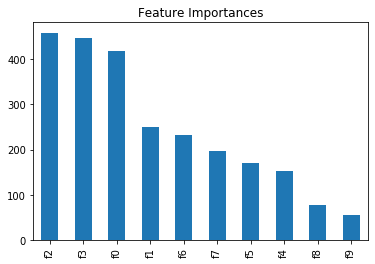

In [135]:

#Define a function for repeat runs while regularizing the parameters
def modelfit(alg, xtrain, ytrain, xtest, ytest, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(xtrain, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    eval_set = [(xtest, ytest)]
    #Fit the algorithm on the data
    alg.fit(xtrain, ytrain,eval_metric='error',eval_set = eval_set, verbose = 1)
        
    #Predict training set:
    dtrain_predictions = alg.predict(xtrain)
    dtrain_predprob = alg.predict_proba(xtrain)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(ytrain.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    
#Find the number of estimators for best accuracy
xgb2 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 verbosity =1)
modelfit(xgb2, X_train_scaled, y_train, X_test_scaled, y_test)

#Regularize the max depth and min child weight parameters by first going through a wide range and using the number of estimators from pervious step
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=49, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_scaled,y_train)
gsearch1.best_params_, gsearch1.best_score_

#Fine tune the parameters by shortening the range
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=49, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train_scaled,y_train)
gsearch2.best_params_, gsearch2.best_score_

#Fine tune the gamma parameter with the two set values tuned before
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=49, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, return_train_score=True), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_scaled,y_train)
gsearch3.best_params_, gsearch3.best_score_

#Fine tune the gamma parameter with the two set values tuned before
param_test3 = {
 'gamma':[0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=49, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, return_train_score=True), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_scaled,y_train)
gsearch3.best_params_, gsearch3.best_score_

#Search for subsample and colsample_by
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=49, max_depth=5,
 min_child_weight=5, gamma=0.11, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,return_train_score=True), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train_scaled,y_train)
gsearch4.best_params_, gsearch4.best_score_

#Search for the right values by making the search space narrow
param_test5 = {
 'subsample':[i/100.0 for i in range(50,70,5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=49, max_depth=5,
 min_child_weight=5, gamma=0.11, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train_scaled,y_train)
gsearch5.best_params_, gsearch5.best_score_

#Tune the regularization parameters
param_test6 = {
 'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=49, max_depth=5,
 min_child_weight=5, gamma=0.11, subsample=0.65, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train_scaled,y_train)
gsearch6.best_params_, gsearch6.best_score_



[0]	validation_0-error:0.11227
[1]	validation_0-error:0.11227
[2]	validation_0-error:0.11227
[3]	validation_0-error:0.11227
[4]	validation_0-error:0.11227
[5]	validation_0-error:0.11227
[6]	validation_0-error:0.11227
[7]	validation_0-error:0.11227
[8]	validation_0-error:0.11227
[9]	validation_0-error:0.11227
[10]	validation_0-error:0.11234
[11]	validation_0-error:0.11227
[12]	validation_0-error:0.11213
[13]	validation_0-error:0.11207
[14]	validation_0-error:0.11197
[15]	validation_0-error:0.11210
[16]	validation_0-error:0.11217
[17]	validation_0-error:0.11213
[18]	validation_0-error:0.11200
[19]	validation_0-error:0.11213
[20]	validation_0-error:0.11217
[21]	validation_0-error:0.11217
[22]	validation_0-error:0.11220
[23]	validation_0-error:0.11217
[24]	validation_0-error:0.11207
[25]	validation_0-error:0.11210
[26]	validation_0-error:0.11207
[27]	validation_0-error:0.11207
[28]	validation_0-error:0.11207
[29]	validation_0-error:0.11210
[30]	validation_0-error:0.11210
[31]	validation_0-

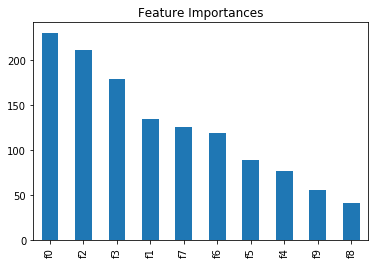

In [136]:
#Build the final model with all parameters regularized
xgb_final = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=49,
 max_depth=5,
 min_child_weight=5,
 gamma=0.11,
 subsample=0.65,
 colsample_bytree=0.6,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 verbosity =1)
modelfit(xgb_final, X_train_scaled, y_train,X_test_scaled, y_test)

#Get accuracy of the final regularized model
y_pred_f = xgb_final.predict(X_train_scaled)
print('Train accuracy score:',accuracy_score(y_train.values,y_pred_f))
print('Test accuracy score:',accuracy_score(y_test,xgb1.predict(X_test_scaled)))
print(classification_report(y_train,y_pred_f))